In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Help us to find total missing etries in each columns
df.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [4]:
# Categorizing each area type into specific group and counting values for each group 
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# Removing non-essential columns
df2 = df.drop(['area_type' , 'availability' , 'society','balcony'] , axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#Checking how many null values in each columns of my dataframe has.
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#Treating these Missing values
median = df2.bath.median()

df2['bath'] = df2.bath.fillna(median)

In [8]:
median

np.float64(2.0)

In [9]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [10]:
#Droping rest of na values in other columns
df3 = df2.dropna()

In [11]:
df3.shape

(13303, 5)

In [12]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
# Since 2BHK and 2 Bedroom is a same thing let's make it unique in any format for more visualization
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\SaLaar\AppData\Local\Temp\ipykernel_9136\2728770401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3[df3.bhk>20]
#Conveying error > like how its posiible that 2400 sqft apartment has 43 bedroom so now i explore total_sqft columns to find more insights

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2110,), dtype=object)

In [18]:
#Just look at the above output we have "1133 - 1384" range given so which definitely an error so we have to get rid rid of these range inorder to get a single values 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [19]:
# It will give us all those values where total_sqft values are not float or inconsistent
df3[~df3.total_sqft.apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [20]:
#Now we handle these values by either converting them or removing them
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        float(x)
    except:
        return None
    return x
        
    

In [21]:
convert_sqft_to_num('5446')

'5446'

In [22]:
convert_sqft_to_num('500 - 510')

505.0

In [23]:
convert_sqft_to_num('perch754')

In [24]:
df4 = df3.copy()

In [25]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [26]:
#Checking the inconsistent value is treated well using index 
df4.loc[56]
#Its now converted well into float

location      Devanahalli
size            4 Bedroom
total_sqft         3210.0
bath                  2.0
price               192.0
bhk                     4
Name: 56, dtype: object

In [27]:
df4.loc[1]

location      Chikka Tirupathi
size                 4 Bedroom
total_sqft                2600
bath                       5.0
price                    120.0
bhk                          4
Name: 1, dtype: object

In [28]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [29]:
df5 = df4.dropna()
df4.shape

(13303, 6)

In [30]:
df5.shape

(13257, 6)

In [31]:
# Here we got a cleaned column > total_sqft containing all num values + all null values are also removed 
df5.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [32]:
df5['total_sqft'] = df5['total_sqft'].astype(float)

C:\Users\SaLaar\AppData\Local\Temp\ipykernel_9136\3542105270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['total_sqft'] = df5['total_sqft'].astype(float)


In [33]:
df5.total_sqft.describe()

count    13257.000000
mean      1558.809175
std       1238.478935
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [34]:
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head()

C:\Users\SaLaar\AppData\Local\Temp\ipykernel_9136\3315746410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
#Dealing with location column
df5.location = df5.location.apply(lambda x: x.strip()) # removes extra spaces 
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

C:\Users\SaLaar\AppData\Local\Temp\ipykernel_9136\1443012865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x: x.strip()) # removes extra spaces


location
Whitefield                         538
Sarjapur  Road                     397
Electronic City                    304
Kanakpura Road                     271
Thanisandra                        236
                                  ... 
beml layout, basaveshwara nagar      1
basaveshwarnagar                     1
1 Giri Nagar                         1
4 Bedroom Farm House in Bagalur      1
3rd Stage Raja Rajeshwari Nagar      1
Name: location, Length: 1287, dtype: int64

In [36]:
location_stats_less_than_10 = (location_stats[location_stats<=10])
location_stats_less_than_10

location
Ganga Nagar                        10
1st Block Koramangala              10
Nagappa Reddy Layout               10
Nagadevanahalli                    10
Gunjur Palya                       10
                                   ..
beml layout, basaveshwara nagar     1
basaveshwarnagar                    1
1 Giri Nagar                        1
4 Bedroom Farm House in Bagalur     1
3rd Stage Raja Rajeshwari Nagar     1
Name: location, Length: 1047, dtype: int64

In [37]:
len(df5.location.unique())

1287

In [38]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


C:\Users\SaLaar\AppData\Local\Temp\ipykernel_9136\2015292744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


In [39]:
df5.location.shape

(13257,)

In [40]:
len(df5.location.unique())

241

In [41]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [42]:
#Outlier Detection and removal > either by method i.e. std / IQR etc OR simply by domain knowledge

# first of all we use domain knowledge like our bedroom size cannot be less than 300 sqft
df5[(df5.total_sqft / df5.bhk) < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [43]:
len(df5[(df5.total_sqft / df5.bhk) < 300])

744

In [44]:
df5.shape

(13257, 7)

In [45]:
df6 = df5[~((df5.total_sqft / df5.bhk) < 300)]

In [46]:
len(df6.bhk)

12513

In [47]:
# now we will remove using  one standarad deviation and we will do it per location > because some location has high price and some has low for same 
#   bkh and sqft.
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std  = np.std(subdf.price_per_sqft)
        reduced_df = subdf[
        (subdf.price_per_sqft > (mean-std)) &
        (subdf.price_per_sqft < (mean+std))
        ]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

df7 = remove_pps_outlier(df6)


In [48]:
df6.shape

(12513, 7)

In [49]:
df7.shape

(10288, 7)

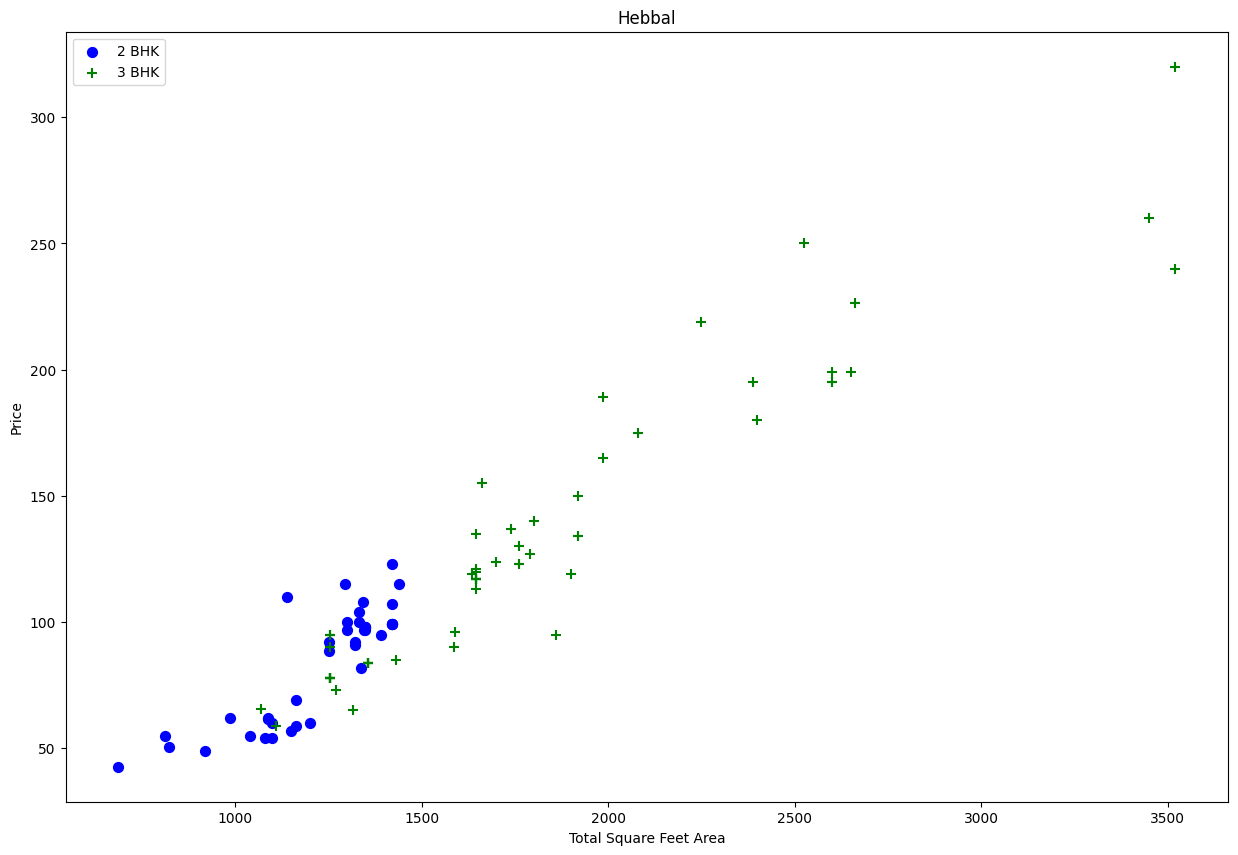

In [50]:
# now i am going to plot a scatter plot to visualize the bhk column for better insights
def plot_scatter_chart(df , location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    matplotlib.rcParams['figure.figsize'] = (15 , 10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s=50)
    plt.scatter(bhk3.total_sqft , bhk3.price ,marker = '+', color = 'green' , label = '3 BHK' , s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Hebbal")

In [51]:
''' from the above visulaization we can clearly see that many bhk3 appartments has less price than bhk2 appartmens for same area.
    Now i will remove them in order to make my data more clear and perfect for model training and evaluation'''


' from the above visulaization we can clearly see that many bhk3 appartments has less price than bhk2 appartmens for same area.\n    Now i will remove them in order to make my data more clear and perfect for model training and evaluation'

In [52]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk  , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk ,  bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')

df8 = remove_bhk_outlier(df7)
df8.shape 

(7342, 7)

In [53]:
df7.shape

(10288, 7)

In [54]:
''' So we hav removed almost 3000 values where greater bhk appartments has less price than smaller bhk appaertments'''

' So we hav removed almost 3000 values where greater bhk appartments has less price than smaller bhk appaertments'

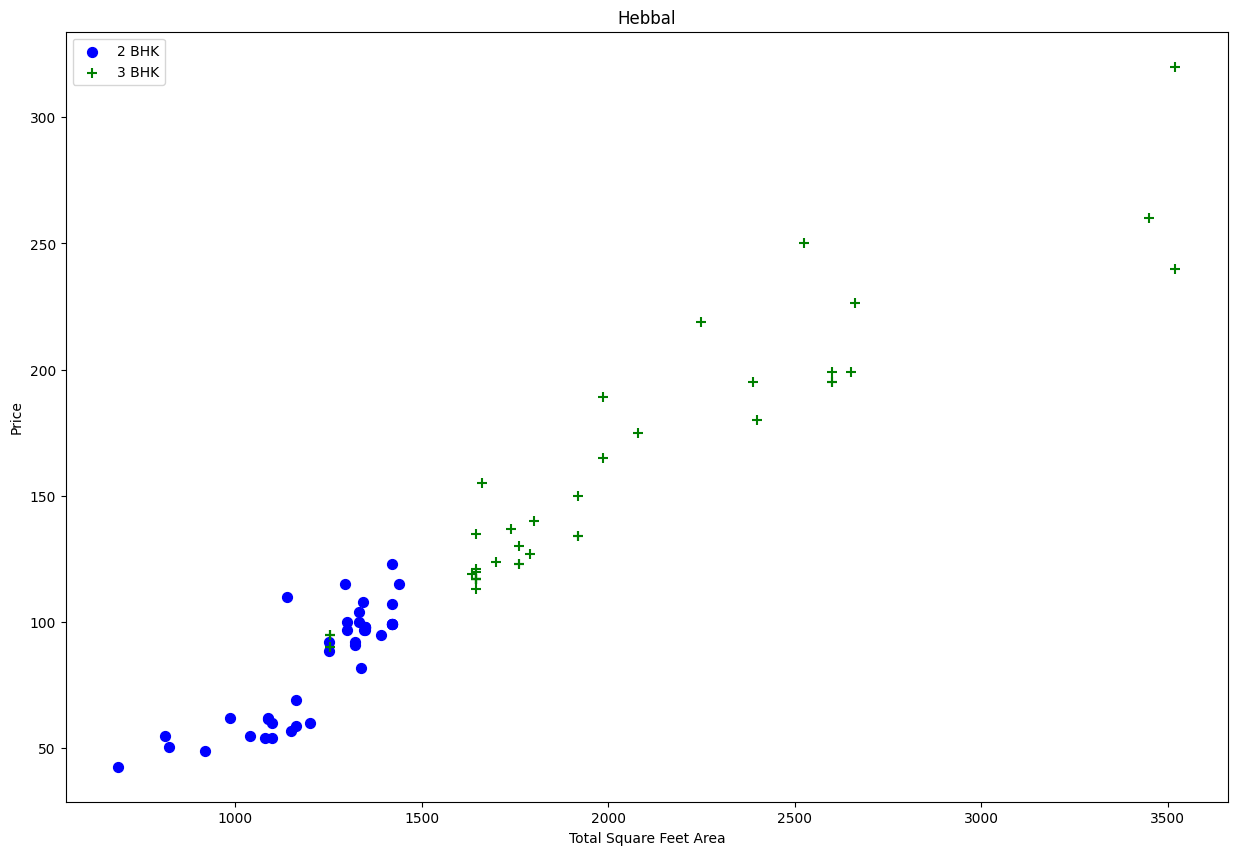

In [55]:
plot_scatter_chart(df8 , 'Hebbal')

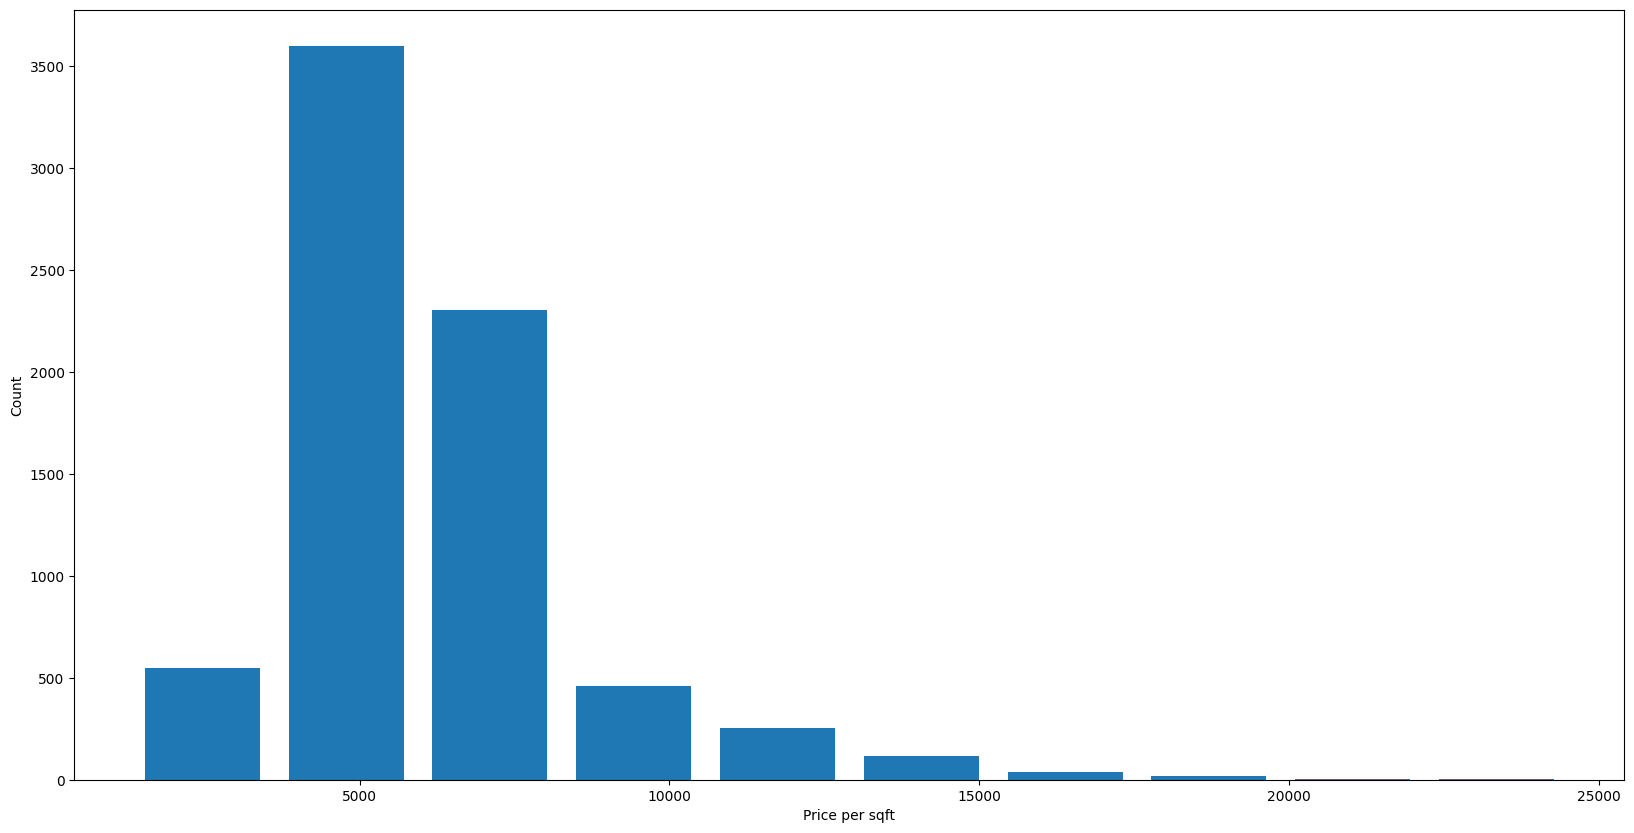

In [56]:

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft ,  rwidth = 0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")
plt.show()
# This shows that from 0 to 10000 sqft i have majority of my data points

In [57]:
#Checking unique values in bath feature
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [58]:
df8[df8.bath>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8527,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8616,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9351,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9682,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


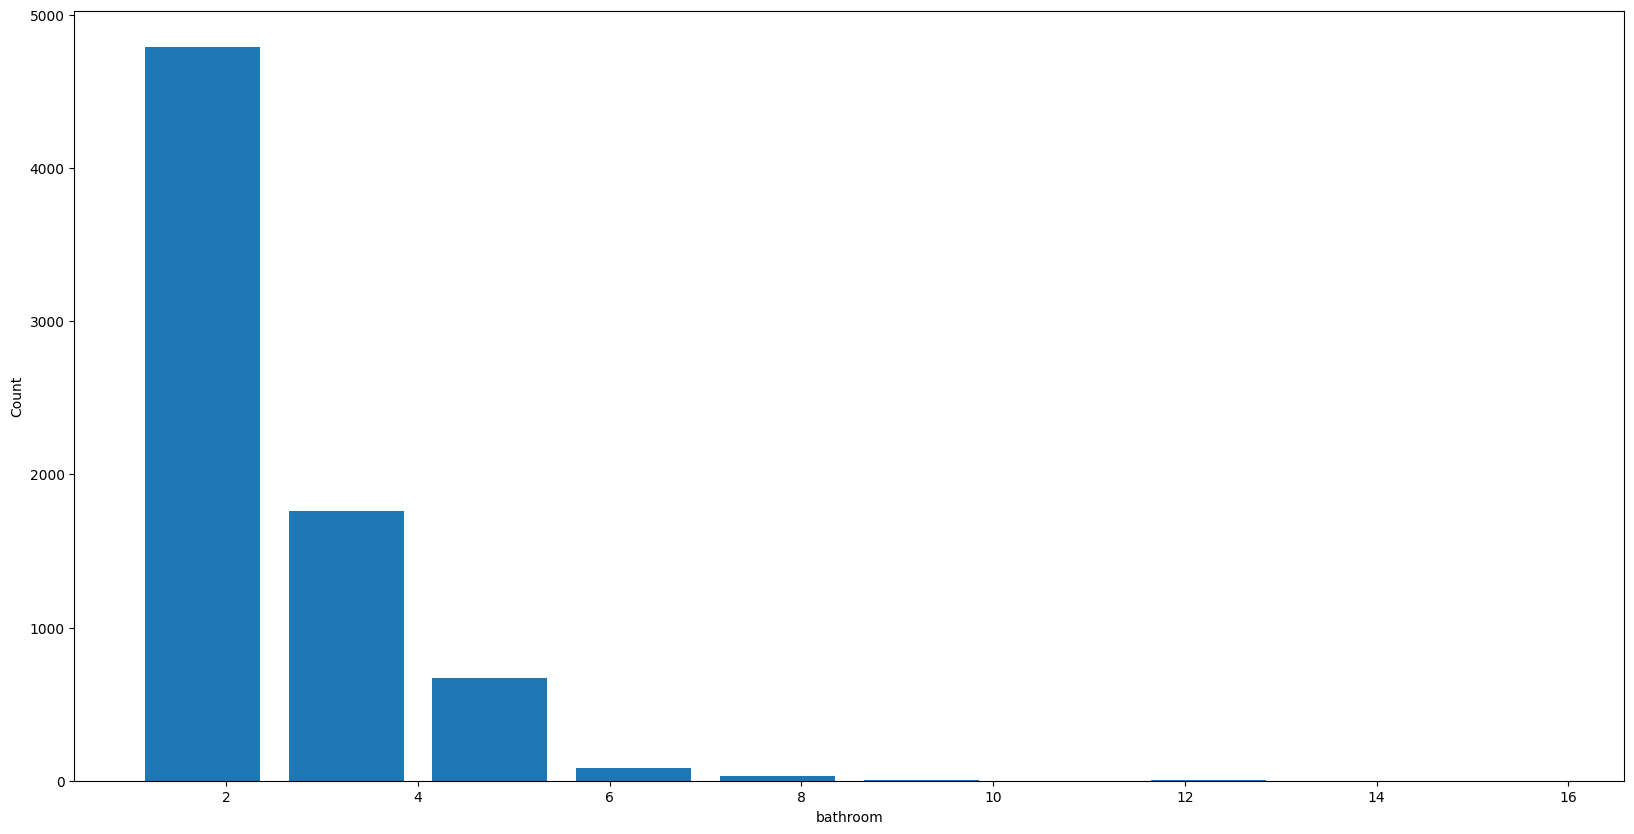

In [59]:
plt.hist(df8.bath , rwidth = 0.8)
plt.xlabel("bathroom")
plt.ylabel('Count')
plt.show()

In [60]:
''' my business manager said that there will be no more  bathrooms more than (bhk[n] + 2) appartments so now i have to remove the outlier
     based on this discussion'''

' my business manager said that there will be no more  bathrooms more than (bhk[n] + 2) appartments so now i have to remove the outlier\n     based on this discussion'

In [61]:
df8[df8.bath > df8.bhk+2] # These are the outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8452,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [62]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7264, 7)

In [63]:
# dropping unnecessary columns
df10 = df9.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df10.head(100)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
106,7th Phase JP Nagar,1180.0,2.0,72.0,2
110,7th Phase JP Nagar,1400.0,3.0,115.0,3
111,7th Phase JP Nagar,1270.0,2.0,83.0,2
113,7th Phase JP Nagar,2503.0,4.0,188.0,4


In [64]:
# ********* Model Building ******************
df_dummies = pd.get_dummies(df10.location)
df_dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10284,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [67]:
df11 = pd.concat([df10 , df_dummies] , axis = "columns")
df11.shape

(7264, 246)

In [66]:
df12 = df11.drop(['location', 'other'], axis = 'columns')
df12.head()


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df12.shape

(7264, 244)

In [69]:
X = df12.drop(['price'],axis = 'columns')
Y = df12.price

In [70]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10280,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10283,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10284,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10279     70.0
10280    200.0
10283    110.0
10284     26.0
10287    400.0
Name: price, Length: 7264, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)
len(X_train)

5811

In [74]:
len(X_test)

1453

In [77]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train , Y_train)
linear_model.score(X_test , Y_test)

0.8388207444759219

#Imporving model accuracy through shuffle shift and cross validation so that my model can train on every type of data sample and we can reduced bias.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
 

In [79]:
#Help us to estimate the  model accuracy through shuffle shift and cross validation so that my model can train on every type of data sample and we can reduced bias.
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5  , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression() , X , Y ,cv=cv)

array([0.80800523, 0.77206975, 0.84432393, 0.84201188, 0.82939234])

In [102]:
#  Evaluating model accuracy using various model along with their best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
               

            }

        },
        'lasso' : {
        'model' : Lasso(),
        'params': {
            'alpha' : [1,2],
            'selection': ['random' , 'cyclic']
        }
        

    },
    'decision_tree' : {
        'model' : DecisionTreeRegressor(),
        'params':{
            'criterion' : ['mse' , 'friedman_mse'],
            'splitter' : ['best' , 'random']

            }


        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size=0.2 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score = False)
        gs.fit(X , Y)
        scores.append({
            'model' : algo_name , 
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
         })
    return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])

find_best_model_using_gridsearchcv(X,Y)


    
      




C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:

,model,best_score,best_params
0,linear_regression,0.819161,{}
1,lasso,0.661121,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.656980,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [103]:
df11.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=246)

In [99]:
# Predicting price 
def predict_price(location ,  sqft , bath , bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    return linear_model.predict([x])[0]

In [104]:
predict_price('2nd Stage Nagarbhavi' , 1200 , 2 ,2 )

C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(196.96375559886815)

In [105]:
predict_price('2nd Stage Nagarbhavi' , 1200 , 3 ,3 )

C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(200.89592824275417)

In [106]:
predict_price('Yeshwanthpur' , 1000, 3 ,3 )

C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(69.73908417167254)

In [109]:
predict_price('Yeshwanthpur' , 1000, 4,3 )

C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(73.35757057721072)

In [110]:
# Exporting the model into a Pickle File
import pickle
with open('bangalore_home_price_prediction_model.pickle' , 'wb') as f:
    pickle.dump(linear_model , f)

In [112]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
    
}
with open('columns.json' , 'w') as f:
    f.write(json.dumps(columns))